# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
import random
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

from sklearn.model_selection import train_test_split

In [2]:
# Configurar pandas para mostrar más valores
np.set_printoptions(threshold=np.inf)

# Cargar datos

In [3]:
file_path = "C:/Users/Herre/Desktop/commercial_activity_df.csv"
file_path_2 = "C:/Users/Herre/Desktop/products_df.csv"
file_path_3 = "C:/Users\Herre\Desktop\sociodemographic_df.csv"

In [4]:
df_comercial_activity = pd.read_csv(file_path)
df_products = pd.read_csv(file_path_2)
df_socialdemographic = pd.read_csv(file_path_3)

# EDA: Análisis Exploratorio

## Quedarnos con las fechas más recientes

VEMOS QUE HAY CLIENTES QUE ESTÁN REPETIDOS, NOS QUEDAMOS CON SU INFORMACIÓN MAS RCIENTE, ES DECIR, QUE NOS QUEDAMOS CON UN SOLA "FILA" POR CLIENTE  (LA QUE TENGA LA FECHA MÁS RECIENTE, ESO EN TODOS LOD DF Y LUEGO INTENTAMOS HACER UN MERGE, PRIMERO CON "PK_CID" Y LUEGO JUNTAMOS LOS 2 DF QUE QUEDAN A APRTIR DE LA COLUMNA "PK_PARTITION" PORQUE SE SUPONE QUE TENEMOS LAS MISMAS FECHAS EN AMBOS DF)

Hay que tener en cuenta que para unir df_comercial_activity y df_socialdemographic solo se puede hacer a través de la columna "pk_cid", por lo tanto, lo primero que hay que hacer es quedarnos con la info de cada cliente pero sin que esté repetida, nos quedamos con la información con fecha más reciente.

## EDA df_comercial_activity

In [5]:
df_comercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   pk_cid           int64  
 2   pk_partition     object 
 3   entry_date       object 
 4   entry_channel    object 
 5   active_customer  float64
 6   segment          object 
dtypes: float64(1), int64(2), object(4)
memory usage: 318.5+ MB


In [6]:
df_comercial_activity.head()

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [7]:
columnas_categoricas = df_comercial_activity.select_dtypes(include=['object']).columns.tolist()
columnas_numericas = df_comercial_activity.select_dtypes(include=['int', 'float']).columns.tolist()

In [8]:
for col in columnas_categoricas:
    unique_values = df_comercial_activity[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in pk_partition: ['2018-01-28' '2018-02-28' '2018-03-28' '2018-04-28' '2018-05-28'
 '2018-06-28' '2018-07-28' '2018-08-28' '2018-09-28' '2018-10-28'
 '2018-11-28' '2018-12-28' '2019-01-28' '2019-02-28' '2019-03-28'
 '2019-04-28' '2019-05-28']
Unique values in entry_date: ['2018-01-12' '2015-08-10' '2015-08-16' '2015-08-14' '2015-08-15'
 '2015-08-20' '2015-10-10' '2015-08-17' '2017-07-09' '2017-10-28'
 '2015-12-28' '2015-08-13' '2015-08-31' '2015-08-09' '2015-09-05'
 '2017-09-28' '2015-09-20' '2015-09-04' '2015-09-24' '2015-09-06'
 '2015-09-03' '2015-09-12' '2015-09-17' '2016-01-21' '2015-09-07'
 '2015-09-27' '2017-09-19' '2017-08-28' '2016-03-20' '2015-10-09'
 '2015-09-11' '2015-09-10' '2016-07-26' '2016-07-11' '2016-04-03'
 '2015-08-30' '2017-12-18' '2016-02-21' '2015-08-22' '2015-08-21'
 '2015-08-29' '2015-10-03' '2015-08-23' '2017-01-28' '2015-08-27'
 '2016-12-21' '2015-08-24' '2015-12-20' '2015-08-28' '2015-11-15'
 '2015-10-11' '2017-08-04' '2016-05-08' '2015-08-26' '

Convertir columnas tipo object a tipo datetime

In [9]:
df_comercial_activity['pk_partition'] = pd.to_datetime(df_comercial_activity['pk_partition'], errors='coerce', format='%Y-%m-%d')
df_comercial_activity['entry_date'] = pd.to_datetime(df_comercial_activity['entry_date'], errors='coerce', format='%Y-%m-%d')

### df_comercial_activity usuarios con fecha más reciente

In [10]:
# Quedarse con la transacción más reciente por usuario (pk_cid)
df_comercial_activity = df_comercial_activity.sort_values('pk_partition').groupby('pk_cid').tail(1).reset_index(drop=True)

In [11]:
df_comercial_activity["pk_cid"].value_counts()

pk_cid
1298102    1
327107     1
313869     1
313778     1
336682     1
          ..
1156347    1
1156346    1
1156345    1
1156344    1
1550586    1
Name: count, Length: 456373, dtype: int64

In [12]:
df_comparison = df_comercial_activity[['pk_cid', 'pk_partition']]
df_comparison

,pk_cid,pk_partition
0,1298102,2018-07-28
1,1297423,2018-07-28
2,1299907,2018-07-28
3,1299811,2018-07-28
4,1299380,2018-07-28
...,...,...
456368,1489285,2019-05-28
456369,1489286,2019-05-28
456370,1489287,2019-05-28
456371,1489273,2019-05-28


## EDA df_products

In [13]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   pk_cid              int64  
 2   pk_partition        object 
 3   short_term_deposit  int64  
 4   loans               int64  
 5   mortgage            int64  
 6   funds               int64  
 7   securities          int64  
 8   long_term_deposit   int64  
 9   em_account_pp       int64  
 10  credit_card         int64  
 11  payroll             float64
 12  pension_plan        float64
 13  payroll_account     int64  
 14  emc_account         int64  
 15  debit_card          int64  
 16  em_account_p        int64  
 17  em_acount           int64  
dtypes: float64(2), int64(15), object(1)
memory usage: 818.9+ MB


In [14]:
df_products.head()

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [15]:
columnas_categoricas_1 = df_products.select_dtypes(include=['object']).columns.tolist()
columnas_numericas_1 = df_products.select_dtypes(include=['int', 'float']).columns.tolist()

In [16]:
for col in columnas_categoricas_1:
    unique_values = df_products[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in pk_partition: ['2018-01-28' '2018-02-28' '2018-03-28' '2018-04-28' '2018-05-28'
 '2018-06-28' '2018-07-28' '2018-08-28' '2018-09-28' '2018-10-28'
 '2018-11-28' '2018-12-28' '2019-01-28' '2019-02-28' '2019-03-28'
 '2019-04-28' '2019-05-28']


Convertir columnas tipo object a tipo datetime

In [17]:
# Convertir la columna 'pk_partition' a tipo datetime
df_products['pk_partition'] = pd.to_datetime(df_products['pk_partition'], errors='coerce', format='%Y-%m-%d')

In [18]:
df_products['pk_partition'].unique()
#Vemos que se han hecho los cambios

<DatetimeArray>
['2018-01-28 00:00:00', '2018-02-28 00:00:00', '2018-03-28 00:00:00',
 '2018-04-28 00:00:00', '2018-05-28 00:00:00', '2018-06-28 00:00:00',
 '2018-07-28 00:00:00', '2018-08-28 00:00:00', '2018-09-28 00:00:00',
 '2018-10-28 00:00:00', '2018-11-28 00:00:00', '2018-12-28 00:00:00',
 '2019-01-28 00:00:00', '2019-02-28 00:00:00', '2019-03-28 00:00:00',
 '2019-04-28 00:00:00', '2019-05-28 00:00:00']
Length: 17, dtype: datetime64[ns]

### df_products usuarios con fecha más reciente

In [19]:
# Quedarse con la transacción más reciente por usuario (pk_cid)
df_products = df_products.sort_values('pk_partition').groupby('pk_cid').tail(1).reset_index(drop=True)

In [20]:
df_products["pk_cid"].value_counts()

pk_cid
1298102    1
327107     1
313869     1
313778     1
336682     1
          ..
1156347    1
1156346    1
1156345    1
1156344    1
1550586    1
Name: count, Length: 456373, dtype: int64

In [21]:
df_comparison_2 = df_products[['pk_cid', 'pk_partition']]
df_comparison_2

,pk_cid,pk_partition
0,1298102,2018-07-28
1,1297423,2018-07-28
2,1299907,2018-07-28
3,1299811,2018-07-28
4,1299380,2018-07-28
...,...,...
456368,1489285,2019-05-28
456369,1489286,2019-05-28
456370,1489287,2019-05-28
456371,1489273,2019-05-28


## EDA df_socialdemographic

In [22]:
df_socialdemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   pk_cid        int64  
 2   pk_partition  object 
 3   country_id    object 
 4   region_code   float64
 5   gender        object 
 6   age           int64  
 7   deceased      object 
 8   salary        float64
dtypes: float64(2), int64(3), object(4)
memory usage: 409.4+ MB


In [23]:
df_socialdemographic.head()

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10
1,1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74
2,2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11
3,3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54
4,4,1050614,2018-01-28,ES,50.0,V,23,N,NaN


In [24]:
columnas_categoricas_2 = df_socialdemographic.select_dtypes(include=['object']).columns.tolist()
columnas_numericas_2 = df_socialdemographic.select_dtypes(include=['int', 'float']).columns.tolist()

In [25]:
for col in columnas_categoricas_2:
    unique_values = df_socialdemographic[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in pk_partition: ['2018-01-28' '2018-02-28' '2018-03-28' '2018-04-28' '2018-05-28'
 '2018-06-28' '2018-07-28' '2018-08-28' '2018-09-28' '2018-10-28'
 '2018-11-28' '2018-12-28' '2019-01-28' '2019-02-28' '2019-03-28'
 '2019-04-28' '2019-05-28']
Unique values in country_id: ['ES' 'CA' 'CH' 'CL' 'IE' 'AT' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE' 'US'
 'MX' 'PL' 'MA' 'GT' 'GA' 'CO' 'BR' 'RU' 'IT' 'NO' 'SN' 'MR' 'ET' 'CN'
 'CM' 'SA' 'CI' 'QA' 'LU' 'SE' 'DJ' 'PT' 'JM' 'RO' 'HU' 'DZ' 'PE']
Unique values in gender: ['H' 'V' nan]
Unique values in deceased: ['N' 'S']


Convertir columnas tipo object en tipo datatime

In [26]:
# Convertir la columna 'pk_partition' a tipo datetime
df_socialdemographic['pk_partition'] = pd.to_datetime(df_socialdemographic['pk_partition'])

In [27]:
df_socialdemographic['pk_partition'].unique()
#Vemos que se han hecho los cambios

<DatetimeArray>
['2018-01-28 00:00:00', '2018-02-28 00:00:00', '2018-03-28 00:00:00',
 '2018-04-28 00:00:00', '2018-05-28 00:00:00', '2018-06-28 00:00:00',
 '2018-07-28 00:00:00', '2018-08-28 00:00:00', '2018-09-28 00:00:00',
 '2018-10-28 00:00:00', '2018-11-28 00:00:00', '2018-12-28 00:00:00',
 '2019-01-28 00:00:00', '2019-02-28 00:00:00', '2019-03-28 00:00:00',
 '2019-04-28 00:00:00', '2019-05-28 00:00:00']
Length: 17, dtype: datetime64[ns]

### df_socialdemographic usuarios con fecha más reciente

In [28]:
# Quedarse con la transacción más reciente por usuario (pk_cid)
df_socialdemographic = df_socialdemographic.sort_values('pk_partition').groupby('pk_cid').tail(1).reset_index(drop=True)

In [29]:
df_socialdemographic["pk_cid"].value_counts()

pk_cid
1298102    1
327107     1
313869     1
313778     1
336682     1
          ..
1156347    1
1156346    1
1156345    1
1156344    1
1550586    1
Name: count, Length: 456373, dtype: int64

In [30]:
df_comparison_1 = df_socialdemographic[['pk_cid', 'pk_partition']]
df_comparison_1

,pk_cid,pk_partition
0,1298102,2018-07-28
1,1297423,2018-07-28
2,1299907,2018-07-28
3,1299811,2018-07-28
4,1299380,2018-07-28
...,...,...
456368,1489285,2019-05-28
456369,1489286,2019-05-28
456370,1489287,2019-05-28
456371,1489273,2019-05-28


## Análisis Univariable

### Análisis Univariable df_comercial_activity

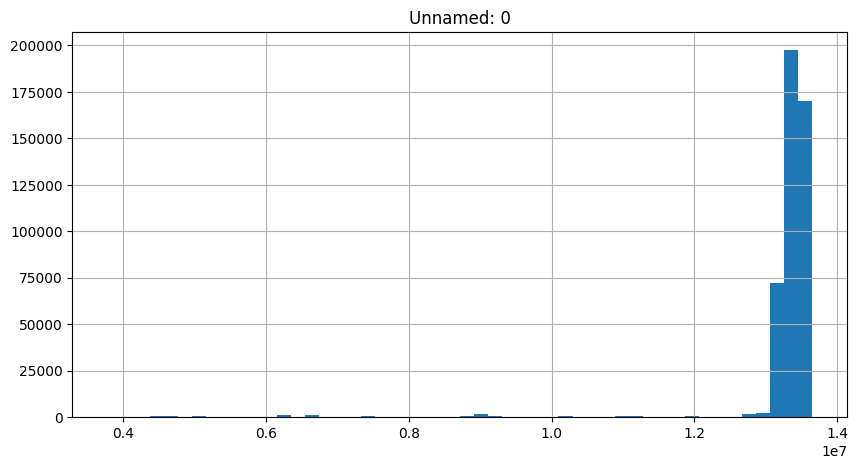

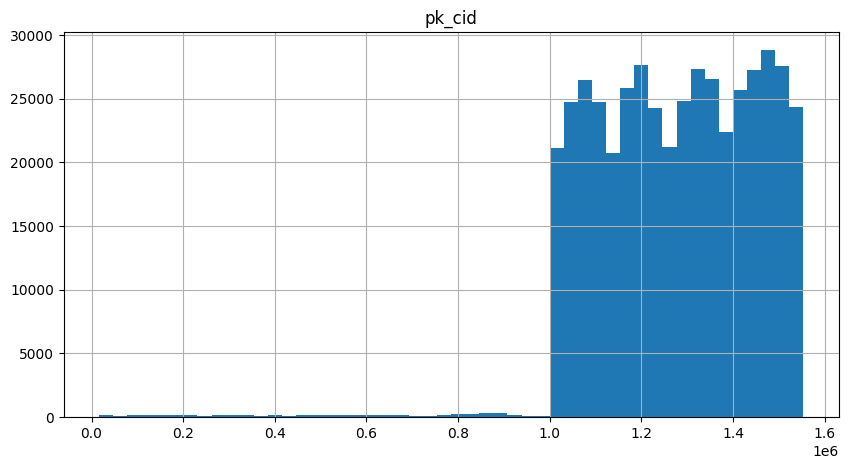

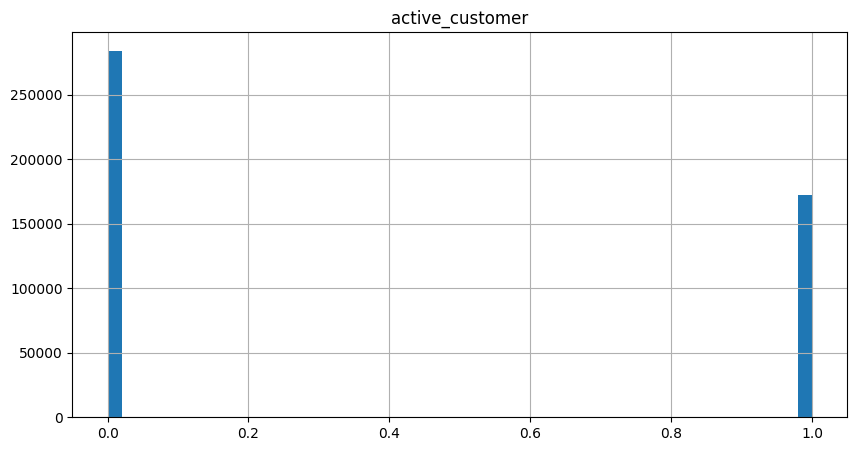

In [31]:
#Primero vamos a hacer los histogramas de las variables numéricas.
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = df_comercial_activity.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    df_comercial_activity[col].hist(bins=50)
    plt.title(col)
    plt.show()

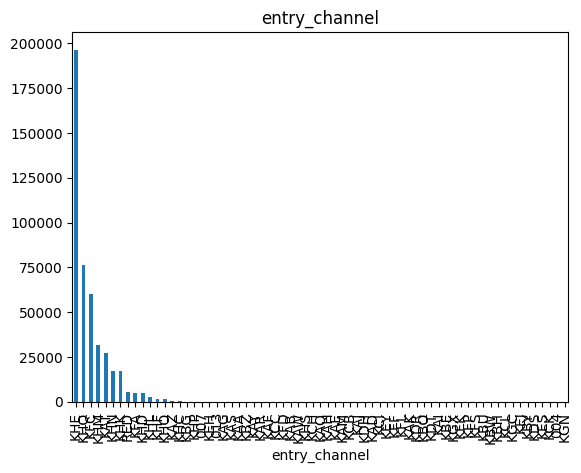

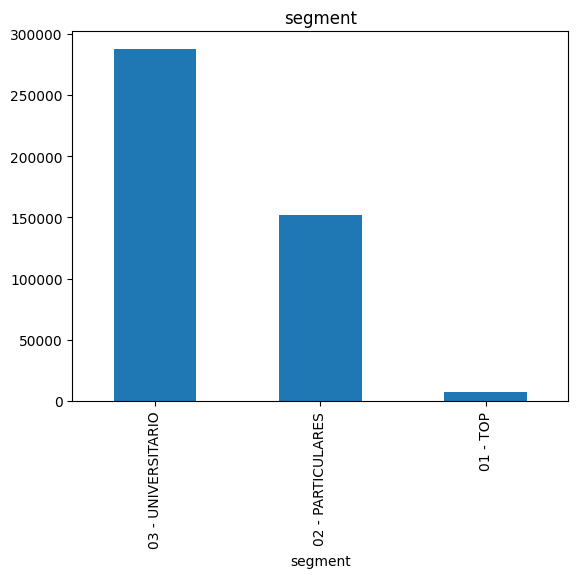

In [32]:
#Ahora crearemos histogramas para todas las columnas categóricas
categorical_columns = df_comercial_activity.select_dtypes(include=[object, 'bool'])
for column in categorical_columns:
    df_comercial_activity[column].value_counts().plot(kind='bar', title=column)
    plt.show()

### Análisis Univariable df_products

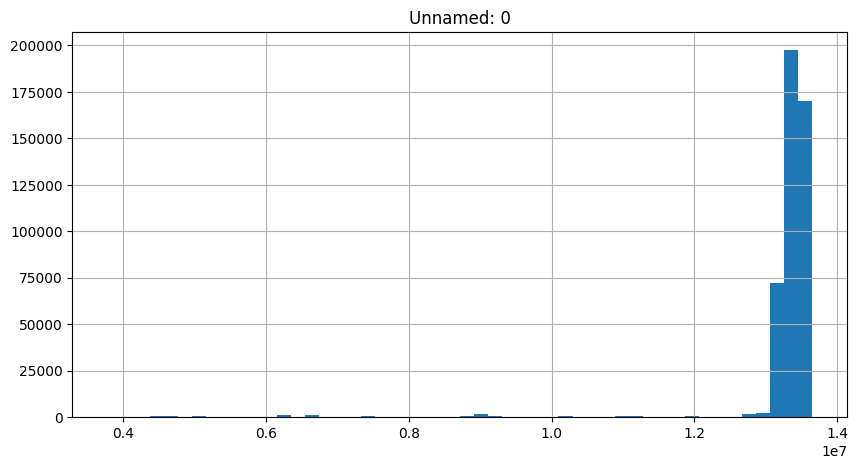

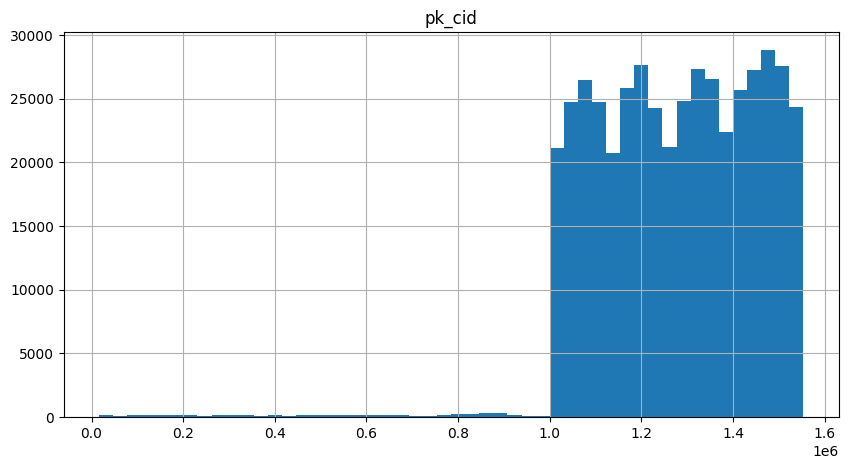

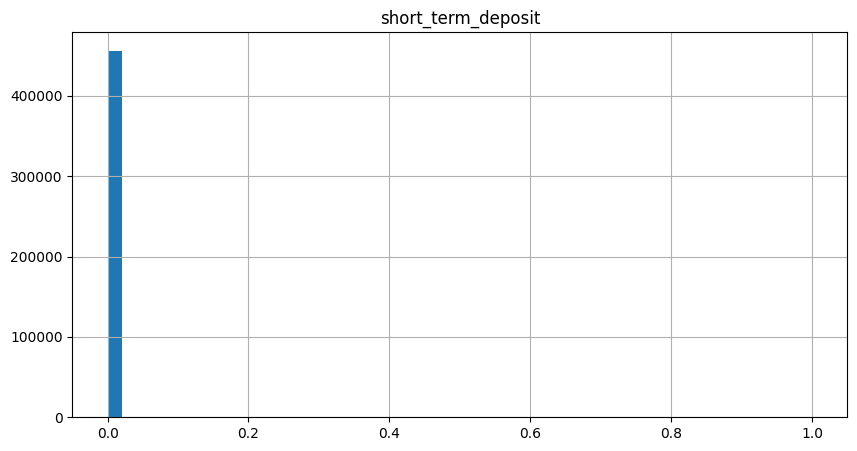

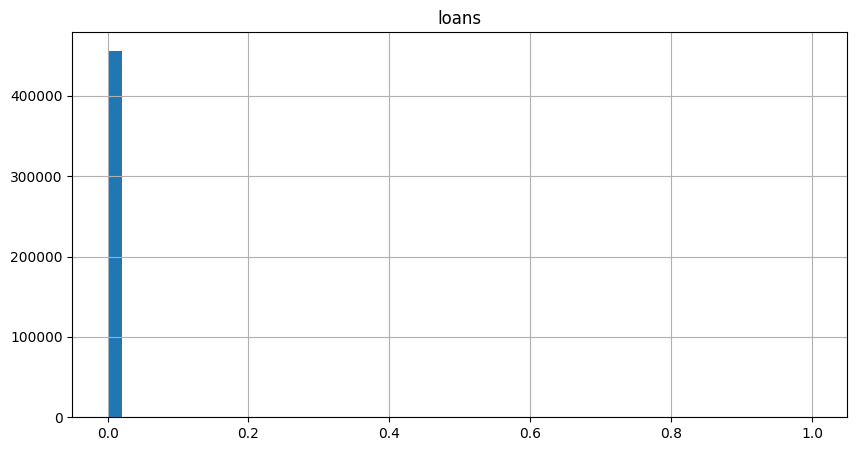

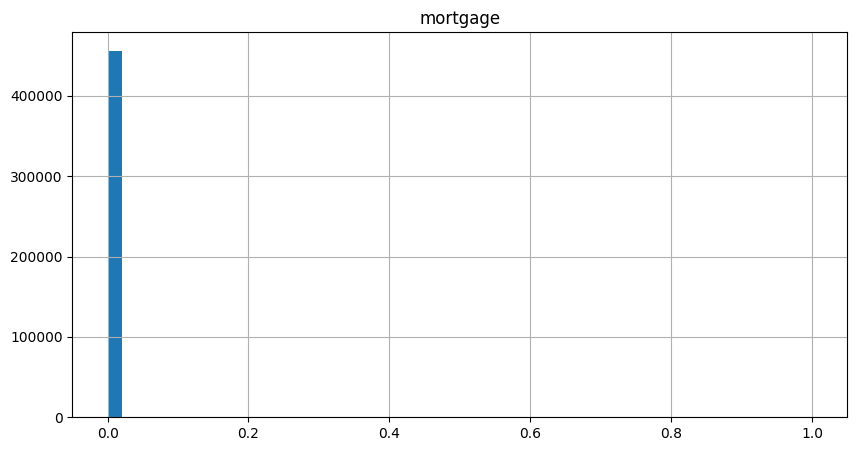

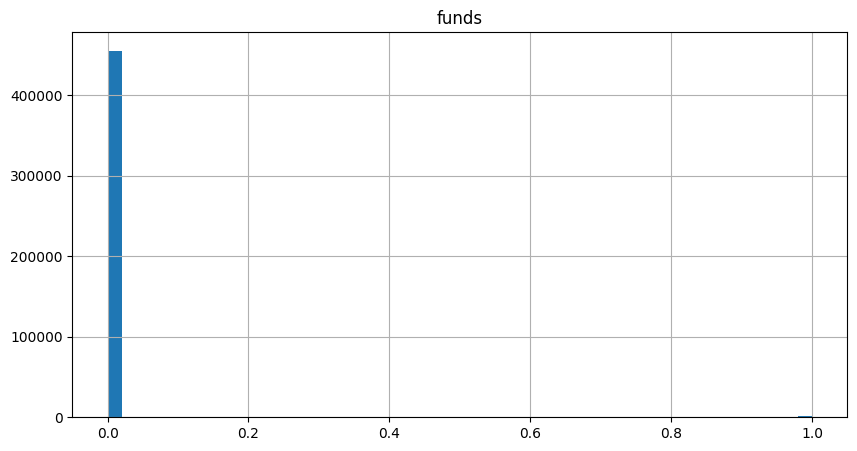

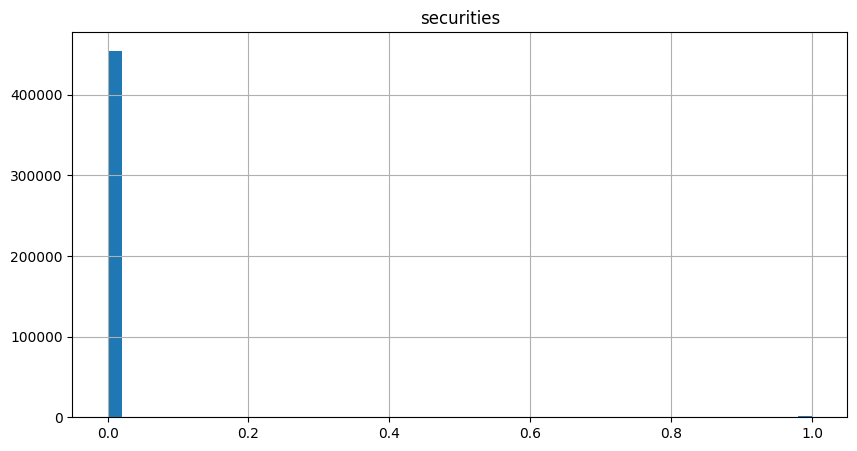

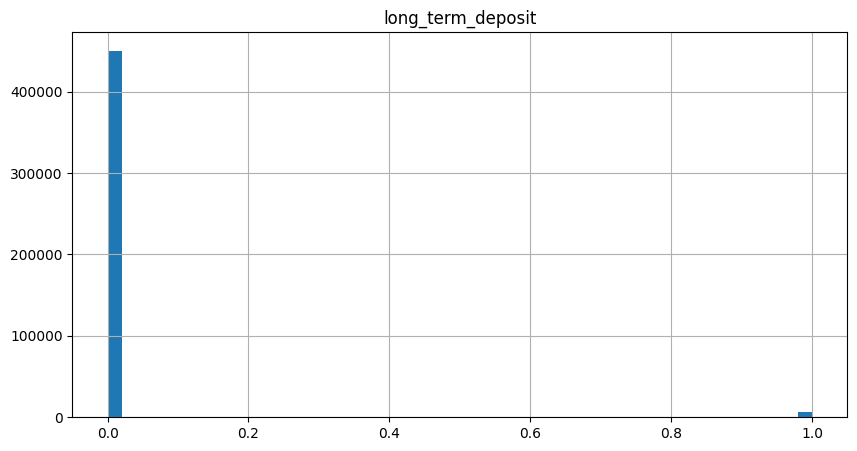

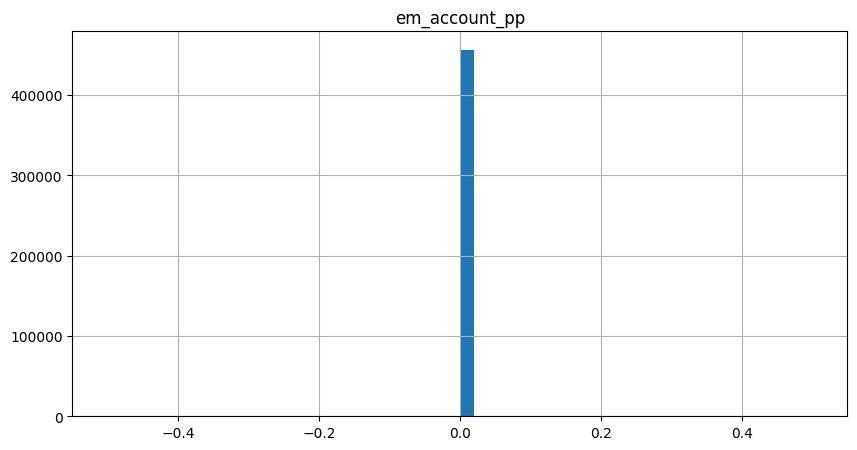

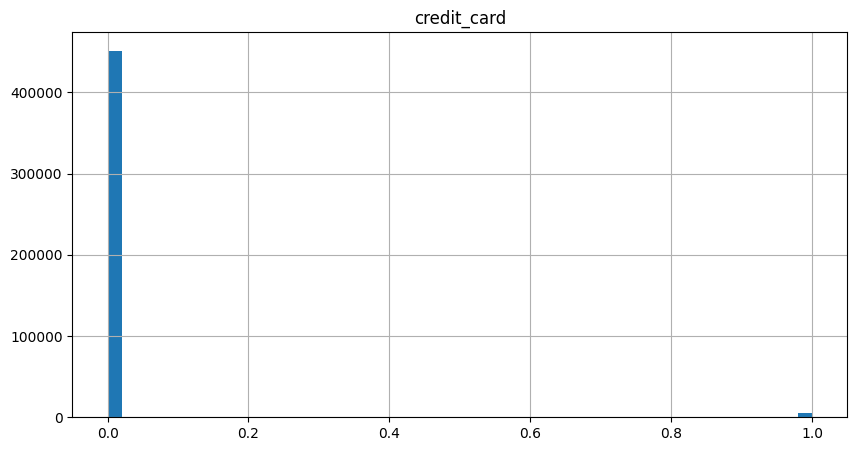

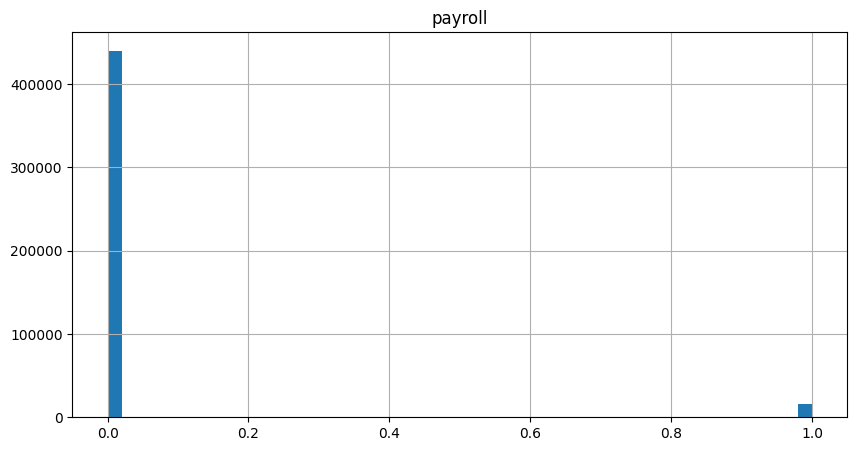

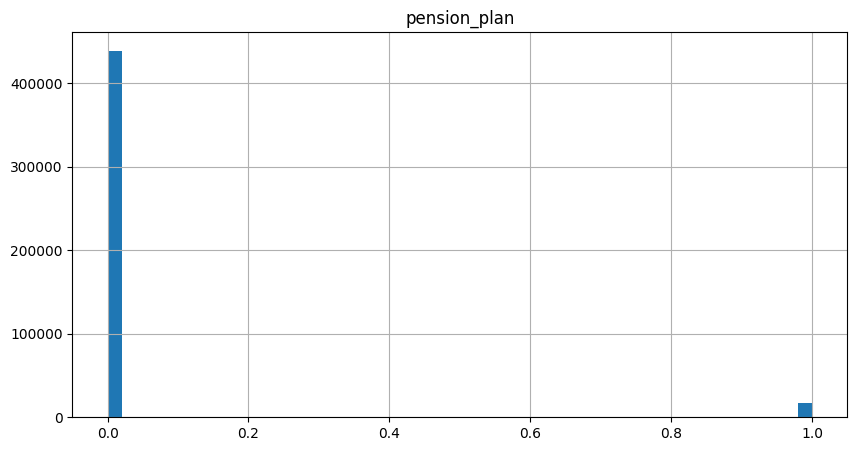

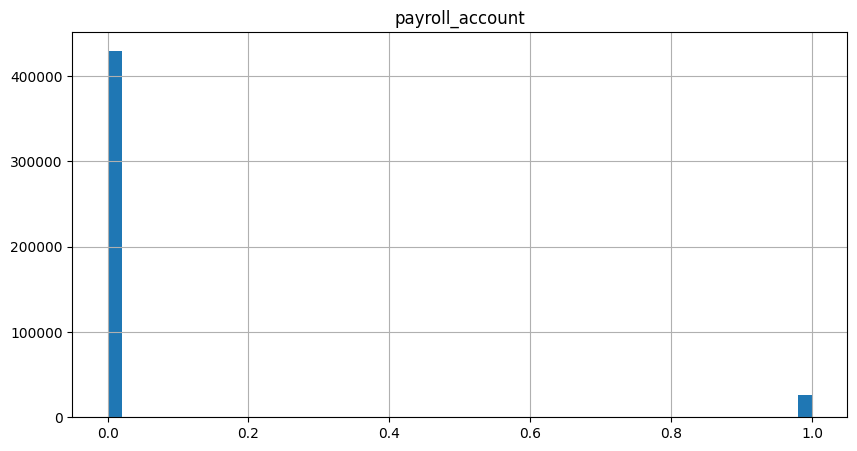

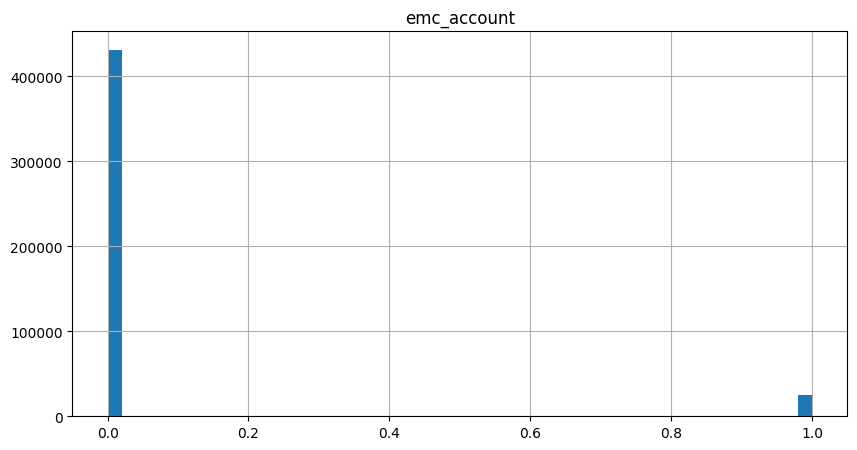

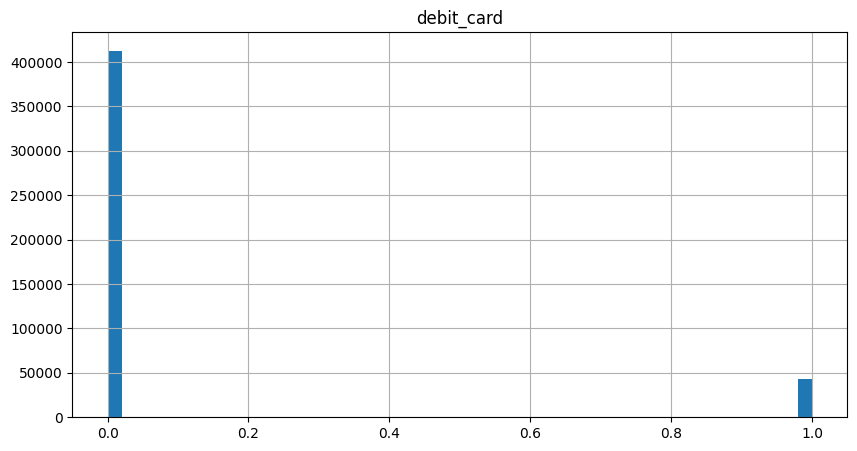

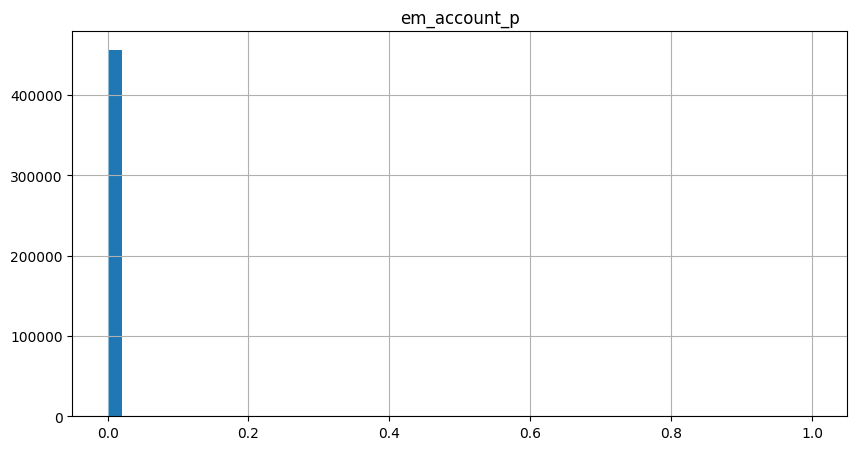

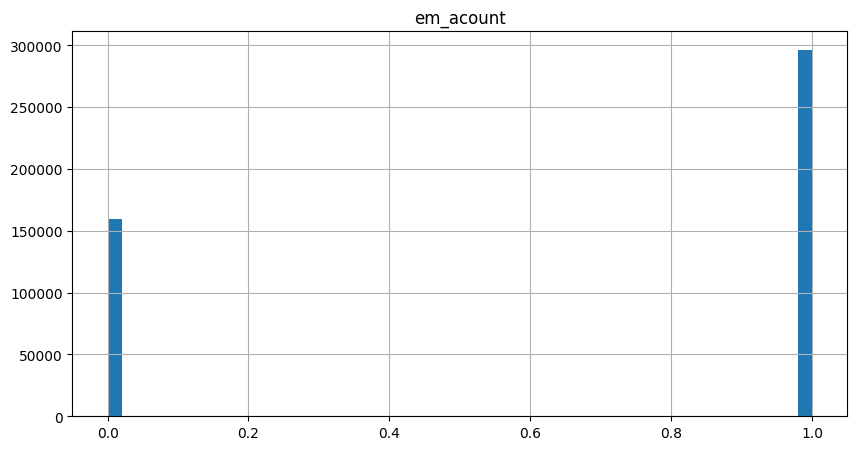

In [33]:
#Primero vamos a hacer los histogramas de las variables numéricas.
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns_1 = df_products.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns_1:
    plt.figure(figsize=(10, 5))
    df_products[col].hist(bins=50)
    plt.title(col)
    plt.show()

In [34]:
#Ahora crearemos histogramas para todas las columnas categóricas
categorical_columns_1 = df_products.select_dtypes(include=[object])
for column in categorical_columns_1:
    df_products[column].value_counts().plot(kind='bar', title=column)
    plt.show()

### Análisis Univariable df_socialdemographic

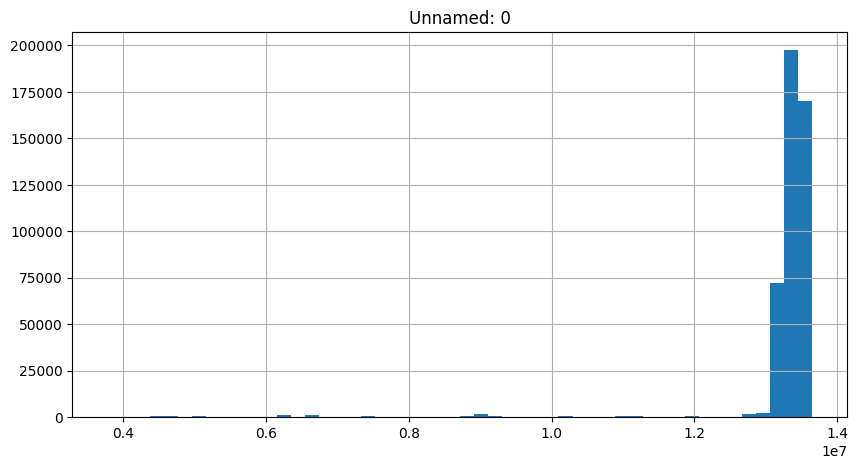

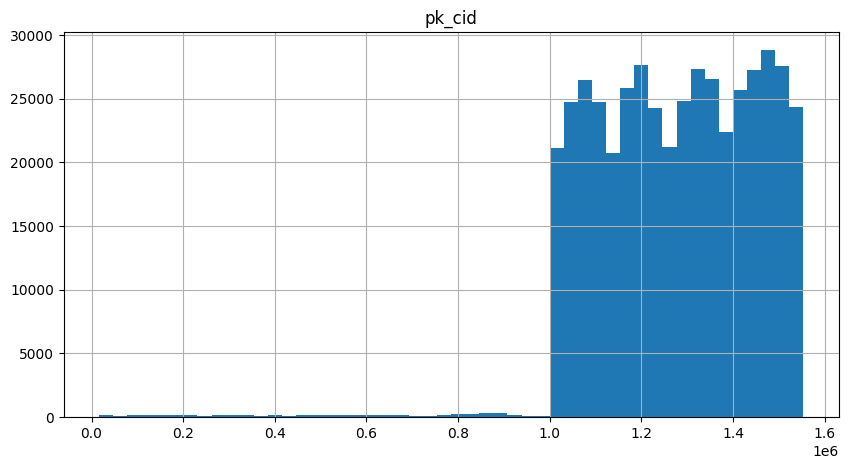

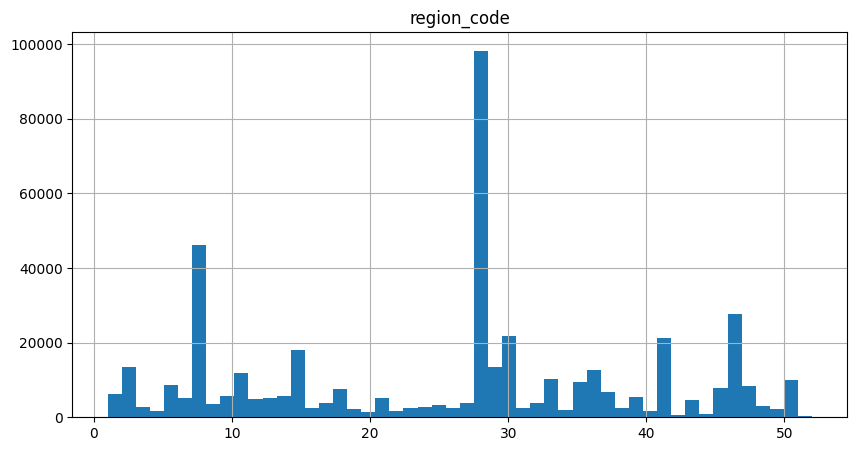

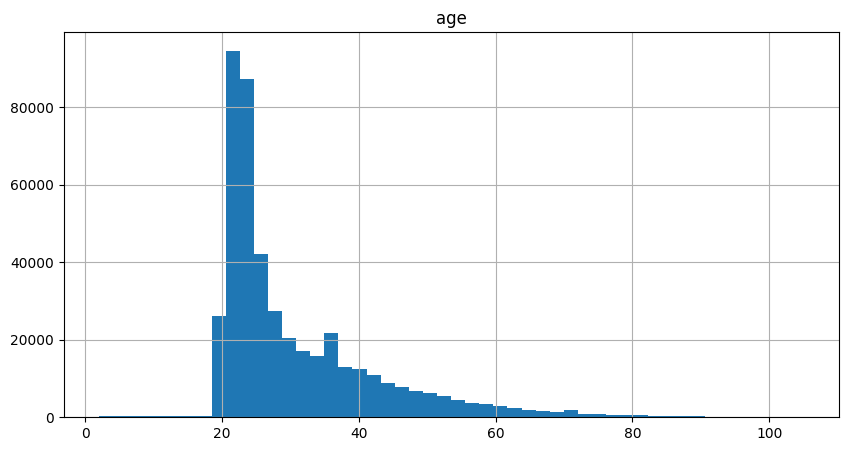

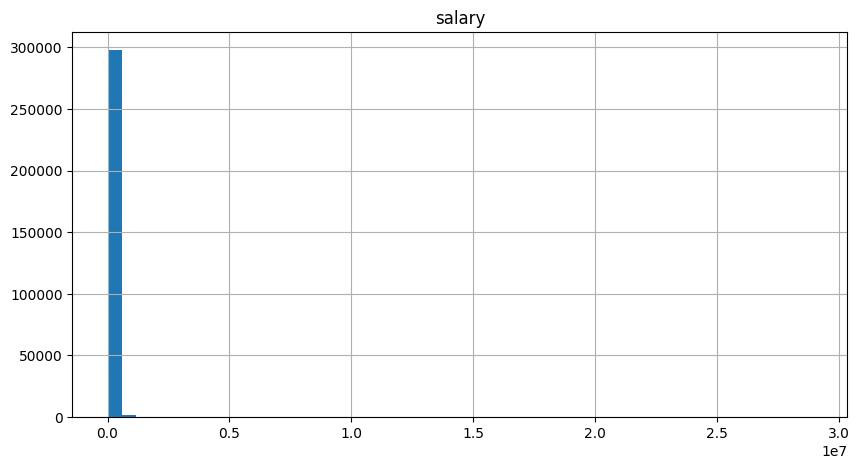

In [35]:
#Primero vamos a hacer los histogramas de las variables numéricas.
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns_2 = df_socialdemographic.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns_2:
    plt.figure(figsize=(10, 5))
    df_socialdemographic[col].hist(bins=50)
    plt.title(col)
    plt.show()

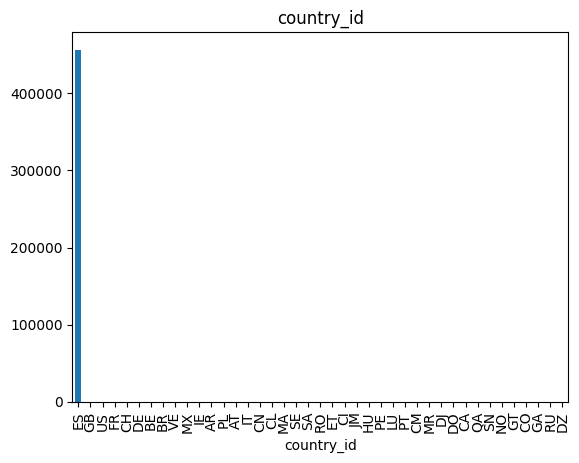

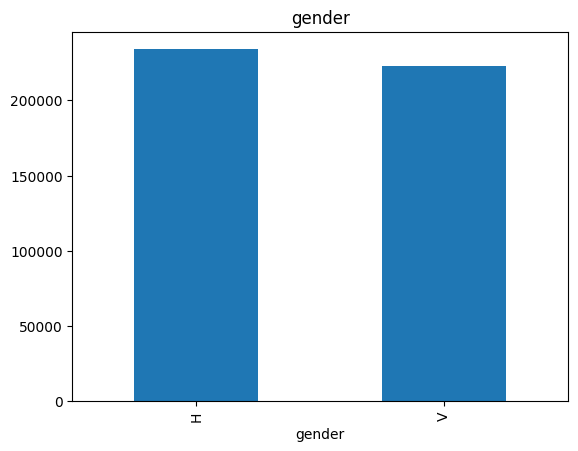

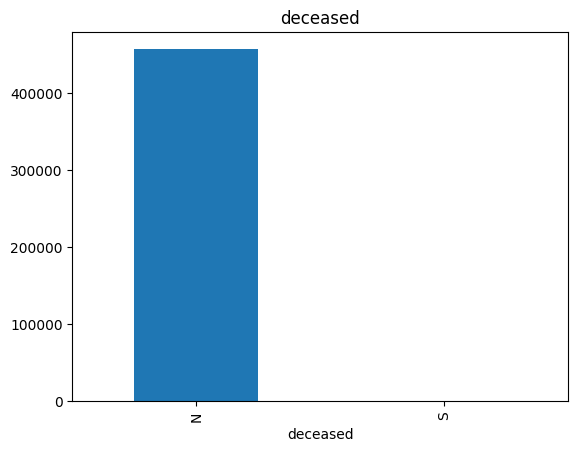

In [36]:
#Ahora crearemos histogramas para todas las columnas categóricas
categorical_columns_2 = df_socialdemographic.select_dtypes(include=[object, 'bool'])
for column in categorical_columns_2:
    df_socialdemographic[column].value_counts().plot(kind='bar', title=column)
    plt.show()

# Data Cleaning

In [37]:
#Ver duplicados de filas exactas

In [38]:
df_comercial_activity[df_comercial_activity.duplicated(keep=False)]

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment


In [39]:
df_products[df_products.duplicated(keep=False)]

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount


In [40]:
df_socialdemographic[df_socialdemographic.duplicated(keep=False)]

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary


## NULOS

### Nulos df_comercial_activity

In [43]:
df_comercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456373 entries, 0 to 456372
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   pk_cid           456373 non-null  int64         
 1   pk_partition     456373 non-null  datetime64[ns]
 2   entry_date       454899 non-null  datetime64[ns]
 3   entry_channel    447360 non-null  object        
 4   active_customer  456373 non-null  float64       
 5   segment          447421 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 20.9+ MB


In [41]:
#Vemos los nulos que hay en cada columna
df_comercial_activity.isnull().sum()

Unnamed: 0            0
pk_cid                0
pk_partition          0
entry_date         1474
entry_channel      9013
active_customer       0
segment            8952
dtype: int64

In [ ]:
# Como previamente hemos hecho una visualización de las columnas y sus variables ya tenemos una idea clara de las acciones que vamos a realizar con cada columna.

In [42]:
# Eliminamos la columna Unnamed

df_comercial_activity.drop(columns=['Unnamed: 0'], inplace=True)

In [46]:
df_comercial_activity = df_comercial_activity.dropna(subset=['entry_channel', 'entry_date', 'segment'])

In [48]:
#Una vez imputados los nulos agrupamos todas quellas variables que representan muy poco porcentaje sobre el total, de esta forma reducimos variables.
#Vamos a agrupar todas aquellas variables que representen el 2% o menos
# Calcular el porcentaje de cada categoría en entry_channel
porcentajes = df_comercial_activity['entry_channel'].value_counts(normalize=True)

# Identificar las categorías con porcentaje menor o igual al 2%
categorias_bajas = porcentajes[porcentajes <= 0.07].index

# Reemplazar las categorías de bajo porcentaje con "Otros"
df_comercial_activity['entry_channel'] = df_comercial_activity['entry_channel'].replace(categorias_bajas, 'Otros')

# Verificar el resultado
print(df_comercial_activity['entry_channel'].value_counts(normalize=True))

entry_channel
KHE      0.440884
Otros    0.253988
KHQ      0.170782
KFC      0.134346
Name: proportion, dtype: float64


In [49]:
df_comercial_activity.reset_index(drop=True,inplace=True)

### Nulos df_products

In [50]:
df_products.isnull().sum()

Unnamed: 0            0
pk_cid                0
pk_partition          0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dtype: int64

In [51]:
#Eliminamos la columna Unnamed

df_products.drop(columns=['Unnamed: 0'], inplace=True)

In [52]:
df_products.reset_index(drop=True,inplace=True)

### Nulos df_socialdemographic

In [64]:
df_socialdemographic.isnull().sum()

pk_cid               0
pk_partition         0
country_id           0
region_code          0
gender               0
age                  0
deceased             0
salary          156774
dtype: int64

In [54]:
#Eliminamos la columna Unnamed

df_socialdemographic.drop(columns=['Unnamed: 0'], inplace=True)

In [55]:
#Primero vamos a agrupar todas las variables menos (ES) de la columna "country_id" en una sola variable llamada Otros
# Agrupar todas las variables menos 'ES' en 'Otros' para la columna 'country_id'
df_socialdemographic['country_id'] = df_socialdemographic['country_id'].apply(lambda x: x if x == 'ES' else 'Otros')

# Verificar el resultado
df_socialdemographic['country_id'].value_counts()


country_id
ES       456209
Otros       164
Name: count, dtype: int64

In [57]:
df_socialdemographic['region_code'].value_counts()

region_code
28.0    98248
8.0     46159
46.0    27711
30.0    21747
41.0    21309
15.0    18132
29.0    13591
3.0     13471
36.0    12659
11.0    11741
33.0    10126
50.0     9956
35.0     9479
6.0      8729
47.0     8410
45.0     7805
18.0     7709
37.0     6697
10.0     5808
14.0     5680
39.0     5468
7.0      5276
2.0      5237
13.0     5089
21.0     5049
12.0     4984
43.0     4653
32.0     3866
17.0     3840
27.0     3731
9.0      3563
25.0     3407
48.0     2941
24.0     2758
4.0      2646
26.0     2601
38.0     2587
16.0     2516
23.0     2455
31.0     2354
19.0     2341
49.0     2206
34.0     1993
22.0     1624
40.0     1605
5.0      1551
20.0     1541
1.0      1061
44.0      943
42.0      697
51.0      245
52.0      214
Name: count, dtype: int64

In [58]:
#En esta base de datos hay columnas con pocos nulos así que los vamos a eliminar
df_socialdemographic = df_socialdemographic.dropna(subset=['region_code', 'gender'])

Nos queda por gestionar el tema de los nulos de la columna "salary":
La mejor opción agrupar a los clientes por columnas tipo "age", "em_acount", "segment", "region_code", "mortgage"..., sacamos la media de salario de esos grupos y luego rellenamos los nulos con esas medias.
CARLES

In [59]:
df_socialdemographic.reset_index(drop=True,inplace=True)

Nos hemos dado cuenta de que el nº de nulos en "region_code" es el mismo nº de filas que hay en la variable Otros de la columna "country_id". Es posible que Otros no tenga "region_code", por lo tanto, podemos eliminar la variable Otros.

In [63]:
# Filtrar el DataFrame para obtener solo las filas donde 'country_id' no sea 'ES'
df_otros = df_socialdemographic[df_socialdemographic['country_id'] == 'Otros']

# Contar las ocurrencias de 'region_code' en el subconjunto filtrado
region_code_counts = df_otros['region_code'].value_counts()

# Mostrar el resultado
print(region_code_counts)


Series([], Name: count, dtype: int64)


# Ordenar dataframe por fecha de mas atigua a mas nueva

In [65]:
# Ordenar el DataFrame por la columna 'pk_partition' de más antiguo a más nuevo
df_socialdemographic = df_socialdemographic.sort_values(by='pk_partition', ascending=True)
df_products = df_products.sort_values(by='pk_partition', ascending=True)
df_comercial_activity = df_comercial_activity.sort_values(by='pk_partition', ascending=True)

In [66]:
df_socialdemographic["pk_partition"].unique()

<DatetimeArray>
['2018-07-28 00:00:00', '2018-08-28 00:00:00', '2018-09-28 00:00:00',
 '2018-10-28 00:00:00', '2018-11-28 00:00:00', '2018-12-28 00:00:00',
 '2019-01-28 00:00:00', '2019-02-28 00:00:00', '2019-03-28 00:00:00',
 '2019-04-28 00:00:00', '2019-05-28 00:00:00']
Length: 11, dtype: datetime64[ns]

In [67]:
df_products["pk_partition"].unique()

<DatetimeArray>
['2018-07-28 00:00:00', '2018-08-28 00:00:00', '2018-09-28 00:00:00',
 '2018-10-28 00:00:00', '2018-11-28 00:00:00', '2018-12-28 00:00:00',
 '2019-01-28 00:00:00', '2019-02-28 00:00:00', '2019-03-28 00:00:00',
 '2019-04-28 00:00:00', '2019-05-28 00:00:00']
Length: 11, dtype: datetime64[ns]

In [68]:
df_comercial_activity["pk_partition"].unique()

<DatetimeArray>
['2018-07-28 00:00:00', '2018-08-28 00:00:00', '2018-09-28 00:00:00',
 '2018-10-28 00:00:00', '2018-11-28 00:00:00', '2018-12-28 00:00:00',
 '2019-01-28 00:00:00', '2019-02-28 00:00:00', '2019-03-28 00:00:00',
 '2019-04-28 00:00:00', '2019-05-28 00:00:00']
Length: 11, dtype: datetime64[ns]

# Merge

Antes de seguir haciendo limpieza hay que hacer un merge de los 3 deaframes

In [69]:
# Fusionar df_comercial_activity y df_products por 'pk_cid' 
df_merged = pd.merge(df_comercial_activity, df_products, on='pk_cid', how='inner', suffixes=('_comercial', '_product'))

In [70]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445655 entries, 0 to 445654
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   pk_cid                  445655 non-null  int64         
 1   pk_partition_comercial  445655 non-null  datetime64[ns]
 2   entry_date              445655 non-null  datetime64[ns]
 3   entry_channel           445655 non-null  object        
 4   active_customer         445655 non-null  float64       
 5   segment                 445655 non-null  object        
 6   pk_partition_product    445655 non-null  datetime64[ns]
 7   short_term_deposit      445655 non-null  int64         
 8   loans                   445655 non-null  int64         
 9   mortgage                445655 non-null  int64         
 10  funds                   445655 non-null  int64         
 11  securities              445655 non-null  int64         
 12  long_term_deposit       445655

In [71]:
#Vamos a borrar la columna "pk_partition_product" porque está duplicada y a parte es type object
df_merged.drop(columns=['pk_partition_product'], inplace=True)

In [72]:
df_merged = df_merged.rename(columns={'pk_partition_comercial': 'pk_partition'})
#Cambiamos el nombre de la columna para dejar el nombre estandar de antes

In [73]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445655 entries, 0 to 445654
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pk_cid              445655 non-null  int64         
 1   pk_partition        445655 non-null  datetime64[ns]
 2   entry_date          445655 non-null  datetime64[ns]
 3   entry_channel       445655 non-null  object        
 4   active_customer     445655 non-null  float64       
 5   segment             445655 non-null  object        
 6   short_term_deposit  445655 non-null  int64         
 7   loans               445655 non-null  int64         
 8   mortgage            445655 non-null  int64         
 9   funds               445655 non-null  int64         
 10  securities          445655 non-null  int64         
 11  long_term_deposit   445655 non-null  int64         
 12  em_account_pp       445655 non-null  int64         
 13  credit_card         445655 no

In [74]:
# Fusionar el resultado con df_socialdemographic por 'pk_cid'
df_final = pd.merge(df_merged, df_socialdemographic, on='pk_cid', how='inner', suffixes=('_merged', '_social'))

In [78]:
#Vamos a borrar la columna "pk_partition_product" porque está duplicada y a parte es type object
df_final.drop(columns=['pk_partition_merged'], inplace=True)

In [82]:
df_final = df_final.rename(columns={'pk_partition_social': 'pk_partition'})
#Cambiamos el nombre de la columna para dejar el nombre estandar de antes

In [83]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445489 entries, 0 to 445488
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pk_cid              445489 non-null  int64         
 1   entry_date          445489 non-null  datetime64[ns]
 2   entry_channel       445489 non-null  object        
 3   active_customer     445489 non-null  float64       
 4   segment             445489 non-null  object        
 5   short_term_deposit  445489 non-null  int64         
 6   loans               445489 non-null  int64         
 7   mortgage            445489 non-null  int64         
 8   funds               445489 non-null  int64         
 9   securities          445489 non-null  int64         
 10  long_term_deposit   445489 non-null  int64         
 11  em_account_pp       445489 non-null  int64         
 12  credit_card         445489 non-null  int64         
 13  payroll             445489 no

In [84]:
df_final.isnull().sum()

pk_cid                     0
entry_date                 0
entry_channel              0
active_customer            0
segment                    0
short_term_deposit         0
loans                      0
mortgage                   0
funds                      0
securities                 0
long_term_deposit          0
em_account_pp              0
credit_card                0
payroll                    0
pension_plan               0
payroll_account            0
emc_account                0
debit_card                 0
em_account_p               0
em_acount                  0
pk_partition               0
country_id                 0
region_code                0
gender                     0
age                        0
deceased                   0
salary                146417
dtype: int64

# Eportamos el df_final a un archivo .csv para hacer la segmentación

In [85]:
# Guardar resultados
df_final.to_csv('df_final.csv', index=False)